In [1]:
import xarray
import numpy as np
import pandas
import h5py
import datetime
from ulmo.utils import image_utils
from ulmo.plotting import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mticker
#import healpy as hp

import cartopy
#from ulmo.analysis.spatial_plots import evals_to_healpix, evals_to_healpix_stat, show_med_LL

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# this is going to be my Healpy-less images

/Users/rachelstumpf/ulmo/ulmo/utils/image_utils.py:8: UserWarning: healpy not installed.  Not all functions will work!
  warnings.warn("healpy not installed.  Not all functions will work!")


In [2]:
# plot 1: healpy of entire globe SST field as example

# August 10, 2012 (day 223)
'''
aug10 = xarray.open_dataset('/home/jovyan/20120810120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc')
analysis_table = pandas.read_parquet('/home/jovyan/SST_L3S_VIIRS_2012.parquet')

In [8]:
'''
eval_tbl = analysis_table
nside = 64
hpma, hp_lons, hp_lats, hp_values = evals_to_healpix_stat(eval_tbl, nside, metric = 'mean_temperature', stat = 'mean')

In [ ]:
'''fig = plt.figure(figsize=(12,8))
color='bwr'
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap(color)
good = np.invert(hp_values.mask)
img = plt.scatter(x=hp_lons[good],
    y=hp_lats[good],
    c=hp_values[good],  
    cmap=cm,
    s=1,
    transform=tformP)

cb = plt.colorbar(img, orientation='horizontal', pad=0.)
clbl = 'Sea Surface Temperature (demeaned)'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)
ax.coastlines(zorder=10)
ax.set_global()
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,
                  color='black', alpha=0.5, linestyle=':', draw_labels=True)

gl.top_labels = True
gl.left_labels = True
gl.right_labels = True
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}
gl.ylabel_style = {'color': 'black'}
plt.title("August 10, 2012: Mean SST")

plt.show()

#save_dir = os.path.expanduser('~/plots')
#save_filename = os.path.join(save_dir, 'plot1.png')

#plt.savefig(save_filename, dpi=300, bbox_inches='tight')
#plt.close(fig)
# mean per cutout and lots median of cutouts in that area

In [2]:
file_path = '/Users/rachelstumpf/Desktop/20120810120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc'
aug10 = xarray.open_dataset(file_path)
aug10['sea_surface_temperature'] = aug10['sea_surface_temperature'] - 273.15
aug10 = aug10['sea_surface_temperature'].squeeze(dim='time')

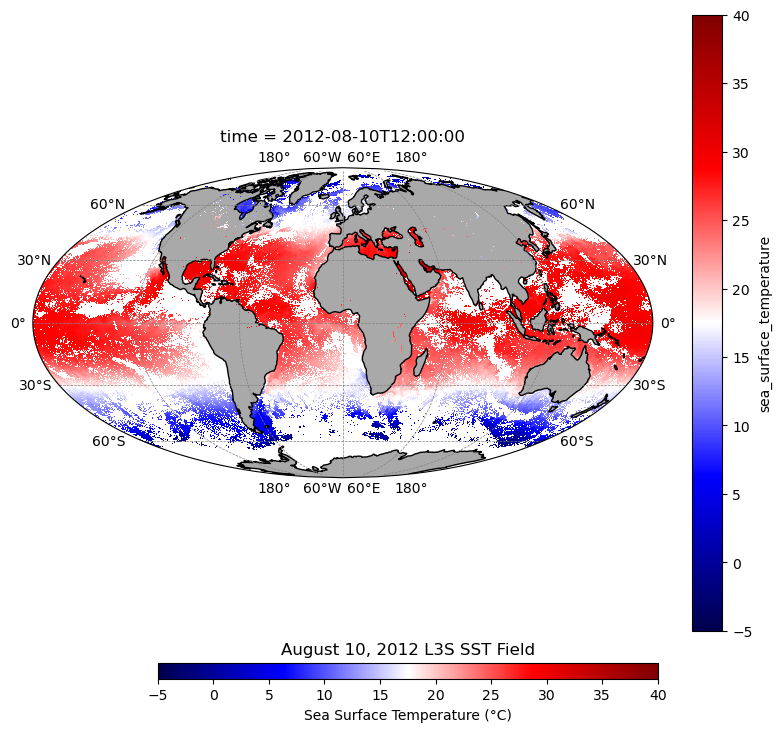

In [4]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.Mollweide())

im = aug10.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmin=-5, vmax=40)

ax.add_feature(cartopy.feature.LAND, facecolor='darkgray')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='black')

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5, linestyle='--', color='gray')
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(mticker.MultipleLocator(base=1.0))

plt.title('August 10, 2012 L3S SST Field')
cax = fig.add_axes([0.25, 0.05, 0.5, 0.02])

cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
cbar.set_label('Sea Surface Temperature (°C)')

plt.show()

In [17]:
file_path = '/Users/rachelstumpf/Desktop/20120810120000-STAR-L3S_GHRSST-SSTsubskin-LEO_AM_D-ACSPO_V2.80-v02.0-fv01.0.nc'
aug10day = xarray.open_dataset(file_path)
aug10day['sea_surface_temperature'] = aug10day['sea_surface_temperature'] - 273.15

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.Mollweide())

im = aug10day['sea_surface_temperature'].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmin = -5, vmax = 40)

ax.add_feature(cartopy.feature.LAND, facecolor='darkgray')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='black')

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5, linestyle='--', color='gray')
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(mticker.MultipleLocator(base=1.0))

cax = fig.add_axes([0.25, 0.05, 0.5, 0.02])
cbar = plt.colorbar(im, orientation='horizontal', shrink=0.7, cax = cax)
cbar.set_label('Sea Surface Temperature (°C)')

plt.title('August 10, 2012 L3 Daytime SST Field')
plt.show()

In [ ]:
file_path = '/Users/rachelstumpf/Desktop/20120810120000-STAR-L3S_GHRSST-SSTsubskin-LEO_PM_N-ACSPO_V2.80-v02.0-fv01.0.nc')
aug10night = xarray.open_dataset(file_path)
aug10night['sea_surface_temperature'] = aug10night['sea_surface_temperature'] - 273.15

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.Mollweide())

im = aug10might['sea_surface_temperature'].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmin = -5, vmax = 40)

ax.add_feature(cartopy.feature.LAND, facecolor='darkgray')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='black')

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5, linestyle='--', color='gray')
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(mticker.MultipleLocator(base=1.0))

cax = fig.add_axes([0.25, 0.05, 0.5, 0.02])
cbar = plt.colorbar(im, orientation='horizontal', shrink=0.7, cax = cax)
cbar.set_label('Sea Surface Temperature (°C)')

plt.title('August 10, 2012 L3 Nighttime SST Field')
plt.show()

In [13]:
# plot 2: VIIRS sensor map

file_path = '/Users/rachelstumpf/Desktop/2012-08-10_00_00_00_2012-08-10_23_59_59-SST100-anal_temp--70_70_0_360-.5.NETCDF'
viirs_aug10 = xarray.open_dataset(file_path)

/Users/rachelstumpf/anaconda3/lib/python3.10/site-packages/xarray/conventions.py:427: SerializationWarning: variable 'ANAL_TEMP' has multiple fill values {9999.0, 999.9}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [17]:
#viirs_aug10

In [ ]:
# plot 3: L3S day map

In [ ]:
# plot 4: L3S night map

In [ ]:
# plot 5: L3S daily map